In [18]:
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
data = requests.get(url)

C:\Users\DELL\anaconda3\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "https://www.worldometers.info/coronavirus/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple
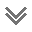

In [19]:
data = data.text
data

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
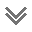

In [6]:
soup = BeautifulSoup(data, "lxml")
soup

In [20]:
soup_table = soup.table
soup_table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [21]:
tags = soup_table.find_all('tr')
tags

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>


In [22]:
tags[0].get_text()

'\n#\nCountry,Other\nTotalCases\nNewCases\nTotalDeaths\nNewDeaths\nTotalRecovered\nNewRecovered\nActiveCases\nSerious,Critical\nTot\xa0Cases/1M pop\nDeaths/1M pop\nTotalTests\nTests/\n1M pop\n\nPopulation\nContinent\n1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl\nNew Cases/1M pop\nNew Deaths/1M pop\nActive Cases/1M pop\n'

In [23]:
tags[1].get_text()

'\n\n\nNorth America\n\n85,403,508\n+18,973\n1,297,752\n+126\n55,167,521\n+57,324\n28,938,235\n32,324\n\n\n\n\n\nNorth America\n\n\n\n\n\n\n\n'

In [25]:
list_data = []
for i in tags:
    x = i.get_text().split('\n')
    list_data.append(x)
                     
print(list_data)

[['', '#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/', '1M pop', '', 'Population', 'Continent', '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop', ''], ['', '', '', 'North America', '', '85,403,508', '+18,973', '1,297,752', '+126', '55,167,521', '+57,324', '28,938,235', '32,324', '', '', '', '', '', 'North America', '', '', '', '', '', '', '', ''], ['', '', '', 'Asia', '', '95,763,540', '+119,181', '1,281,075', '+222', '88,366,592', '+82,916', '6,115,873', '26,425', '', '', '', '', '', 'Asia', '', '', '', '', '', '', '', ''], ['', '', '', 'South America', '', '46,114,346', '+7,837', '1,205,757', '+44', '40,434,425', '+6,568', '4,474,164', '14,405', '', '', '', '', '', 'South America', '', '', '', '', '', '', '', ''], ['', '', '', 'Europe', '', '115,379,681', '+

In [36]:
filtered_data = list_data
del filtered_data[1:9]

In [37]:
del filtered_data[225:]

In [38]:
import csv
b = open('data1.csv','w')
x = csv.writer(b)
for i in list_data:
    x.writerow(i)
    
b.close()


In [45]:
import pandas as pd
df = pd.read_csv('/Class-2pm/data1.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/Class-2pm/data1.csv'

In [35]:
b = open('/Class-2pm/data1.csv')
x = b.read()
print(x)
b.close()

FileNotFoundError: [Errno 2] No such file or directory: '/Class-2pm/data1.csv'

In [47]:
import plotly.express as px
fig = px.bar(df.iloc[0:10], x='Country,Other', y='Total Deaths')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [48]:
import plotly.express as px
fig = px.bar(df.iloc[0:10],value = 'TotalDeaths',names = 'Country,Other')
fig.show()

ModuleNotFoundError: No module named 'plotly'